The intensity transformation

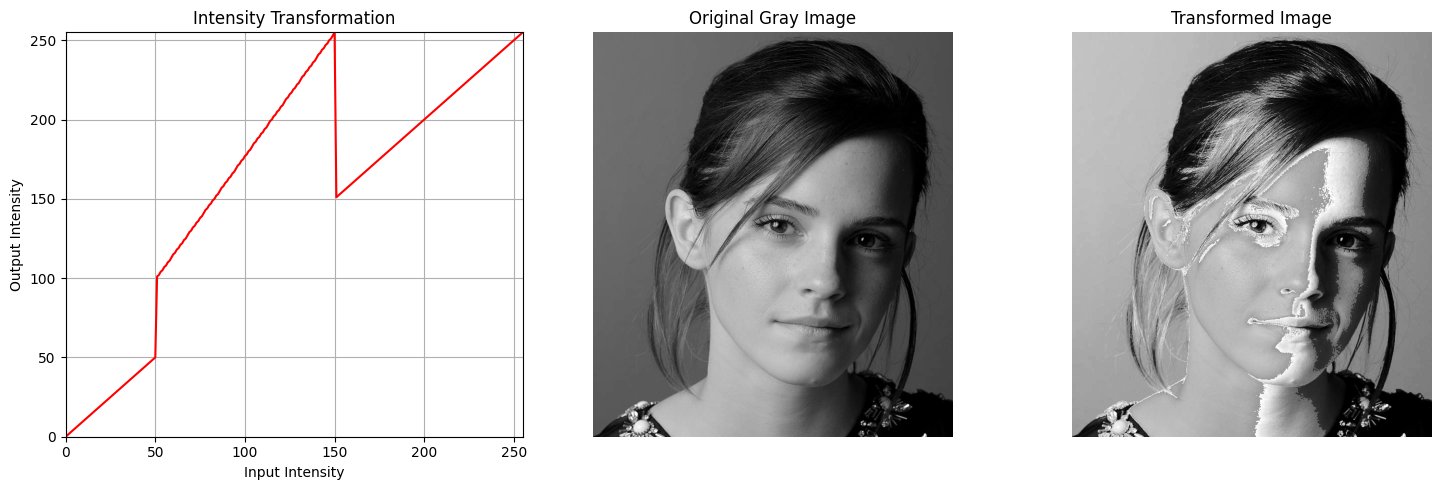

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define control points for intensity transformation
control_points = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Generate intensity mappings based on control points
# Segment 1: From 0 to 50
segment1 = np.linspace(0, control_points[0, 1], control_points[0, 1] + 1).astype('uint8')

# Segment 2: From 51 to 100
segment2 = np.linspace(control_points[0, 1] + 1, control_points[1, 1], control_points[1, 0] - control_points[0, 0]).astype('uint8')

# Segment 3: From 101 to 150
segment3 = np.linspace(control_points[1, 1] + 1, control_points[2, 1], control_points[2, 0] - control_points[1, 0]).astype('uint8')

# Segment 4: From 151 to 150 (this is redundant and should be checked)
segment4 = np.linspace(control_points[2, 1] + 1, control_points[3, 1], control_points[3, 0] - control_points[2, 0]).astype('uint8')

# Segment 5: From 151 to 255
segment5 = np.linspace(control_points[3, 1] + 1, 255, 255 - control_points[3, 0]).astype('uint8')

# Concatenate all segments into a single transformation array
transformation_array = np.concatenate((segment1, segment2), axis=0)
transformation_array = np.concatenate((transformation_array, segment3), axis=0)
transformation_array = np.concatenate((transformation_array, segment4), axis=0)
transformation_array = np.concatenate((transformation_array, segment5), axis=0)

# Load the original grayscale image
original_image = cv.imread("E:/GitHub_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)
assert original_image is not None
# Apply the intensity transformation using the lookup table
transformed_image = cv.LUT(original_image, transformation_array)

# Create a subplot for displaying the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the intensity transformation curve
ax[0].plot(transformation_array, 'r', label='Transformation Curve')
ax[0].set_title('Intensity Transformation')
ax[0].grid(True)
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')

# Display the transformed image
ax[1].imshow(original_image, cmap='gray',vmin=0, vmax=255)
ax[1].axis('off')
ax[1].set_title('Original Gray Image')

# Display the transformed image
ax[2].imshow(transformed_image, cmap='gray',vmin=0, vmax=255)
ax[2].axis('off')
ax[2].set_title('Transformed Image')

# Show the plots
plt.tight_layout()
plt.show()


Identifying the White matter and the Grey Matter Range

Image loaded successfully.


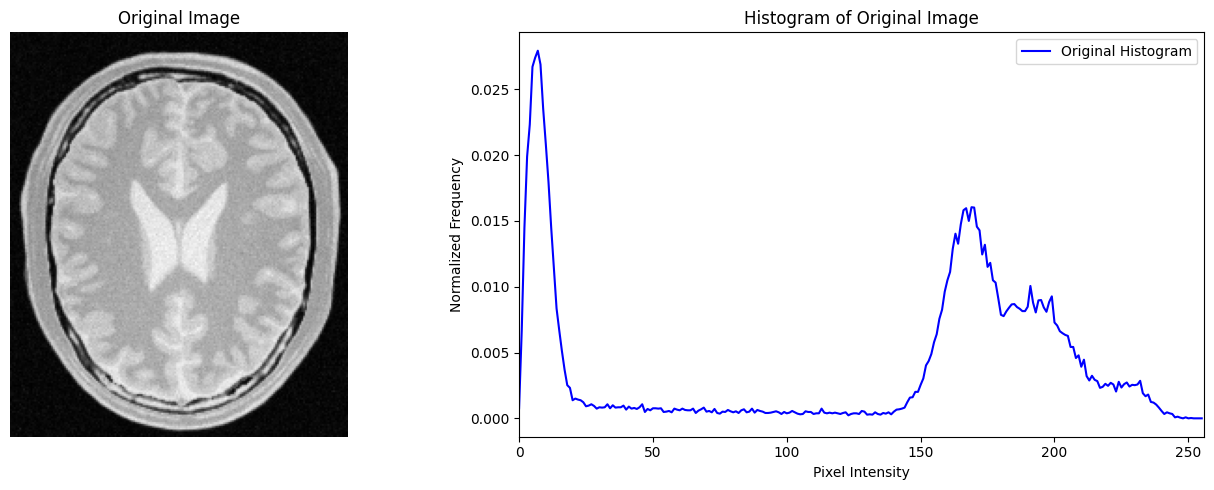

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image in grayscale mode
brain_image = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if brain_image is None:
    print("Error: Unable to load the image.")
else:
    print("Image loaded successfully.")

    # Compute the histogram of the original image
    hist_orig = cv.calcHist([brain_image], [0], None, [256], [0, 256])

    # Normalize the histogram for easier comparison
    hist_orig /= hist_orig.sum()

    # Create subplots to show the original image and its histogram
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Display the original image
    ax[0].imshow(brain_image, cmap='gray',vmin=0, vmax=255)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    # Plot the histogram of the original image
    ax[1].plot(hist_orig, color='blue', label='Original Histogram')
    ax[1].set_xlim([0, 256])
    ax[1].set_xlabel('Pixel Intensity')
    ax[1].set_ylabel('Normalized Frequency')
    ax[1].set_title('Histogram of Original Image')
    ax[1].legend()

    # Show all plots
    plt.tight_layout()
    plt.show()


White Matter Transformation

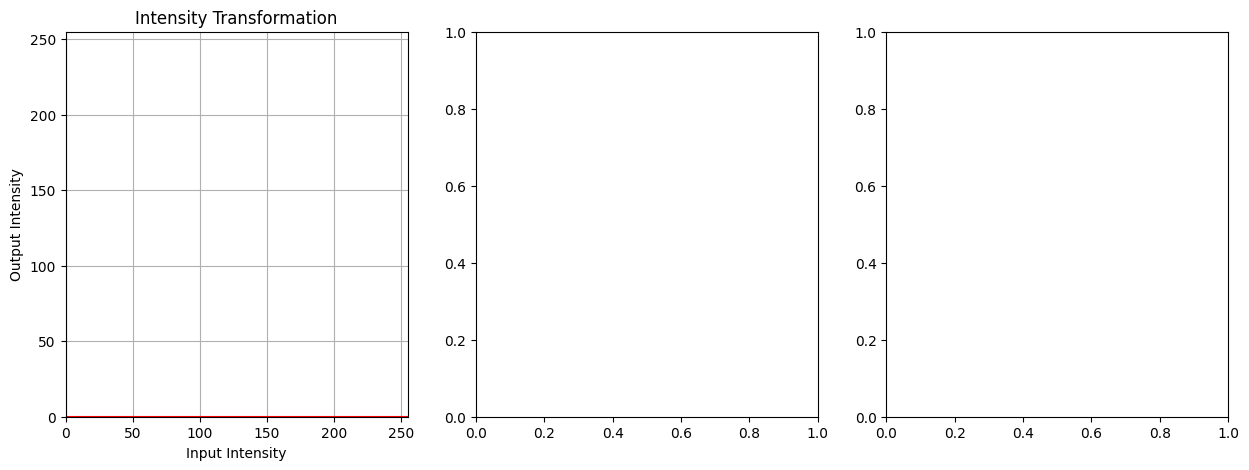

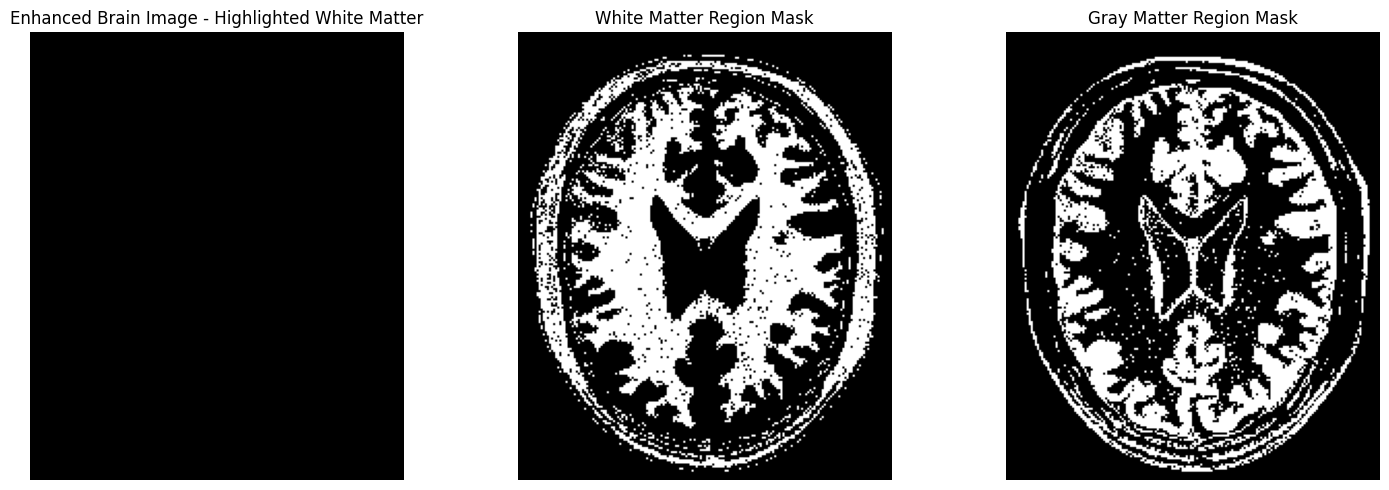

In [47]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Function to enhance pixel intensities for white and gray matter regions
def enhance_matter_regions(image):
    # Make a copy of the original image to apply enhancements
    enhanced_image = np.copy(image)
    
    # Enhance intensities for the white and gray matter regions
    white_matter_region = (image > 150) & (image <= 180)
    gray_matter_region = (image > 180) & (image <= 220)


    # Define control points for intensity transformation
    control_points = np.array([(150, 150), (150, 260), (180, 290), (180, 350),(220, 390),(220, 220)])

    # Generate intensity mappings based on control points
    segment1 = np.linspace(0, control_points[0, 1], control_points[0, 1] + 1).astype('uint8')
    segment2 = np.linspace(control_points[0, 1] + 1, control_points[1, 1], control_points[1, 0] - control_points[0, 0]).astype('uint8')
    segment3 = np.linspace(control_points[1, 1] + 1, control_points[2, 1], control_points[2, 0] - control_points[1, 0]).astype('uint8')
    segment4 = np.linspace(control_points[2, 1] + 1, control_points[3, 1], control_points[3, 0] - control_points[2, 0]).astype('uint8')
    segment5 = np.linspace(control_points[3, 1] + 1, control_points[4, 1], control_points[4, 0] - control_points[3, 0]).astype('uint8')
    segment6 = np.linspace(control_points[4, 1] + 1, control_points[5, 1], control_points[5, 0] - control_points[4, 0]).astype('uint8')
    segment7 = np.linspace(control_points[5, 1] + 1, 255, 255 - control_points[4, 0]).astype('uint8')

    # Concatenate all segments into a single transformation array
    transformation_array = np.concatenate((segment1, segment2), axis=0)
    transformation_array = np.concatenate((transformation_array, segment3), axis=0)
    transformation_array = np.concatenate((transformation_array, segment4), axis=0)
    transformation_array = np.concatenate((transformation_array, segment5), axis=0)
    transformation_array = np.concatenate((transformation_array, segment6), axis=0)
    transformation_array = np.concatenate((transformation_array, segment7), axis=0)


    # Initialize the transformation array
    transformation_array = np.zeros(256, dtype=np.uint8)


    # Apply the intensity mapping using the transformation array
    enhanced_image = cv.LUT(image, transformation_array)

    # Create a subplot for displaying the results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the intensity transformation curve
    ax[0].plot(transformation_array, 'r', label='Transformation Curve')
    ax[0].set_title('Intensity Transformation')
    ax[0].grid(True)
    ax[0].set_xlim([0, 255])
    ax[0].set_ylim([0, 255])
    ax[0].set_xlabel('Input Intensity')
    ax[0].set_ylabel('Output Intensity')

    return enhanced_image, white_matter_region, gray_matter_region



# Apply the enhancement to the brain image
enhanced_brain_image, white_matter_region, gray_matter_region = enhance_matter_regions(brain_image)

# Create subplots to display both the enhanced image and the white/gray matter masks
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the enhanced brain image
ax[0].imshow(enhanced_brain_image, cmap='gray')
ax[0].set_title("Enhanced Brain Image - Highlighted White Matter")
ax[0].axis('off')

# Display the white matter region mask
ax[1].imshow(white_matter_region, cmap='gray')
ax[1].set_title("White Matter Region Mask")
ax[1].axis('off')

# Display the gray matter region mask
ax[2].imshow(gray_matter_region, cmap='gray')
ax[2].set_title("Gray Matter Region Mask")
ax[2].axis('off')

# Show the plots
plt.tight_layout()
plt.show()


Grey Matter Transformation

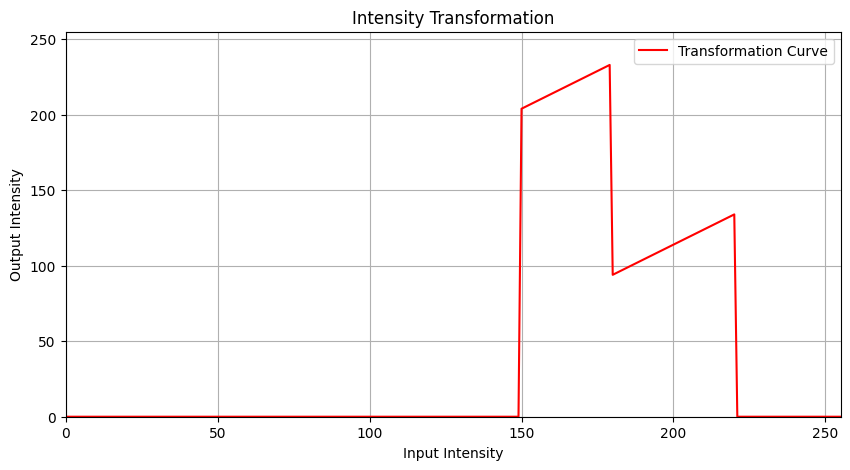

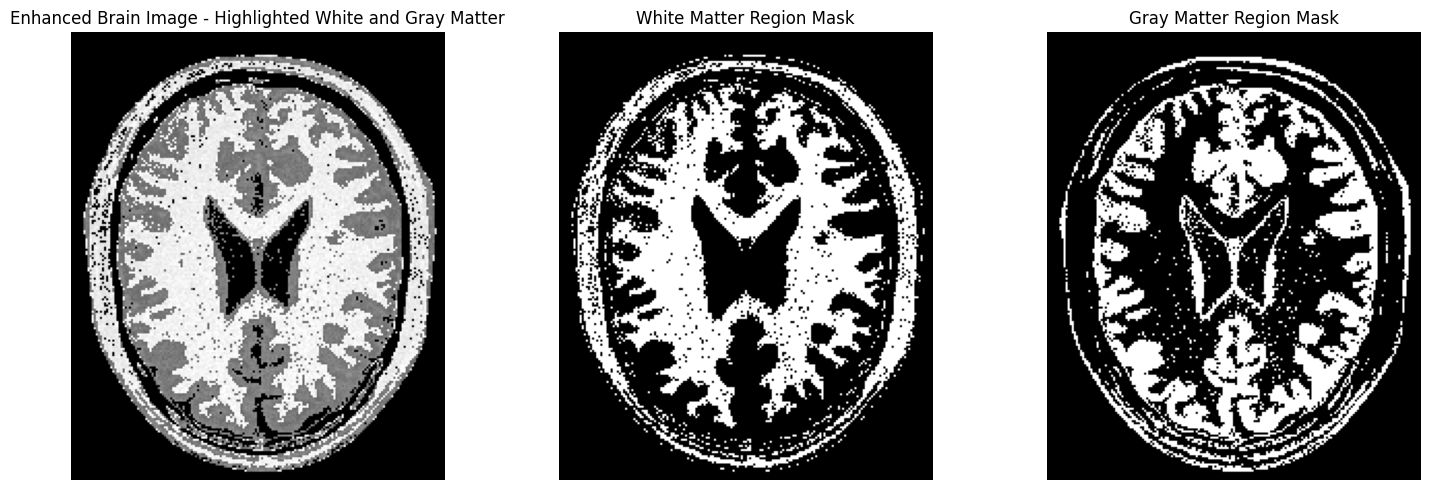

In [59]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Function to enhance pixel intensities for white and gray matter regions
def enhance_matter_regions(image):
    # Make a copy of the original image to apply enhancements
    enhanced_image = np.copy(image)
    
    # Enhance intensities for the white and gray matter regions
    white_matter_region = ((image > 150) & (image <= 180)).astype(np.uint8) * 255
    gray_matter_region = ((image > 180) & (image <= 220)).astype(np.uint8) * 255

    # Define control points for intensity transformation
    control_points = np.array([(150, 150), (150, 460), (180, 490), (180, 350),(220, 390),(220, 220)])

    # Generate intensity mappings based on control points
    transformation_array = np.zeros(256, dtype=np.uint8)

    # Fill the transformation array based on control points
    for i in range(len(control_points) - 1):
        x0, y0 = control_points[i]
        x1, y1 = control_points[i + 1]
        transformation_array[x0:x1 + 1] = np.linspace(y0, y1, x1 - x0 + 1, dtype=np.uint8)

    # Apply the intensity mapping using the transformation array
    enhanced_image = cv.LUT(image, transformation_array)


    # Plot the intensity transformation curve
    plt.figure(figsize=(10, 5))
    plt.plot(transformation_array, 'r', label='Transformation Curve')
    plt.title('Intensity Transformation')
    plt.grid(True)
    plt.xlim([0, 255])
    plt.ylim([0, 255])
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.legend()
    plt.show()

    return enhanced_image, white_matter_region, gray_matter_region

# Apply the enhancement to the brain image
enhanced_brain_image, white_matter_region, gray_matter_region = enhance_matter_regions(brain_image)

# Create subplots to display both the enhanced image and the white/gray matter masks
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the enhanced brain image
ax[0].imshow(enhanced_brain_image, cmap='gray')
ax[0].set_title("Enhanced Brain Image - Highlighted White and Gray Matter")
ax[0].axis('off')

# Display the white matter region mask
ax[1].imshow(white_matter_region, cmap='gray')
ax[1].set_title("White Matter Region Mask")
ax[1].axis('off')

# Display the gray matter region mask
ax[2].imshow(gray_matter_region, cmap='gray')
ax[2].set_title("Gray Matter Region Mask")
ax[2].axis('off')

# Show the plots
plt.tight_layout()
plt.show()
